In [1]:
import os
os.chdir('..')

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from load_data import load_data, process_data

In [3]:
DATA_DIR = Path.cwd() / 'data'
CACA_PATH = DATA_DIR / 'WhatsApp Chat with Caca.txt'

assert CACA_PATH.exists()

In [4]:
POOP_EMOJI = '💩'

data = load_data(CACA_PATH)
data = process_data(data)

Text(0.5, 1.0, 'Poop Emoji Count by User')

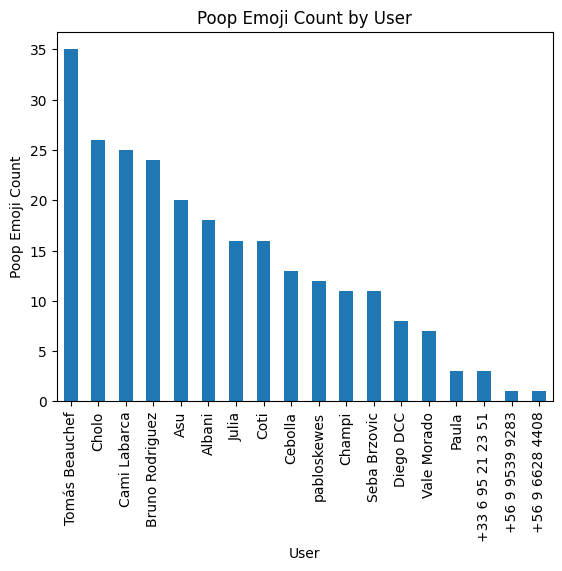

In [6]:
data.user.value_counts().plot.bar()
plt.xlabel('User')
plt.ylabel('Poop Emoji Count')
plt.title('Poop Emoji Count by User')